In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import os
# os.chdir("C:\\Users\\DILIP\\Downloads")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import statsmodels.api as sm
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

ModuleNotFoundError: No module named 'imblearn'

In [15]:


df = pd.read_csv(r'C:\Users\jtkol\OneDrive\Desktop\CSUG Courses\MIS581 - Capstone - Business Intelligence and Data Analytics\Dataset_spine.csv')

In [16]:
df.head()

,pelvic_tilt,sacral_slope,pelvic_radius,degree_spondylolisthesis,Class_att
0,22.552586,40.475232,98.672917,-0.254400,Abnormal
1,10.060991,28.995960,114.405425,4.564259,Abnormal
2,22.218482,46.613539,105.985135,-3.530317,Abnormal
3,24.652878,44.644130,101.868495,11.211523,Abnormal
4,9.652075,40.060784,108.168725,7.918501,Abnormal


In [17]:
df.drop('Unnamed: 13',axis=1,inplace=True)

KeyError: "['Unnamed: 13'] not found in axis"

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_tilt               309 non-null    float64
 1   sacral_slope              309 non-null    float64
 2   pelvic_radius             309 non-null    float64
 3   degree_spondylolisthesis  309 non-null    float64
 4   Class_att                 309 non-null    object 
dtypes: float64(4), object(1)
memory usage: 12.2+ KB


<AxesSubplot:>

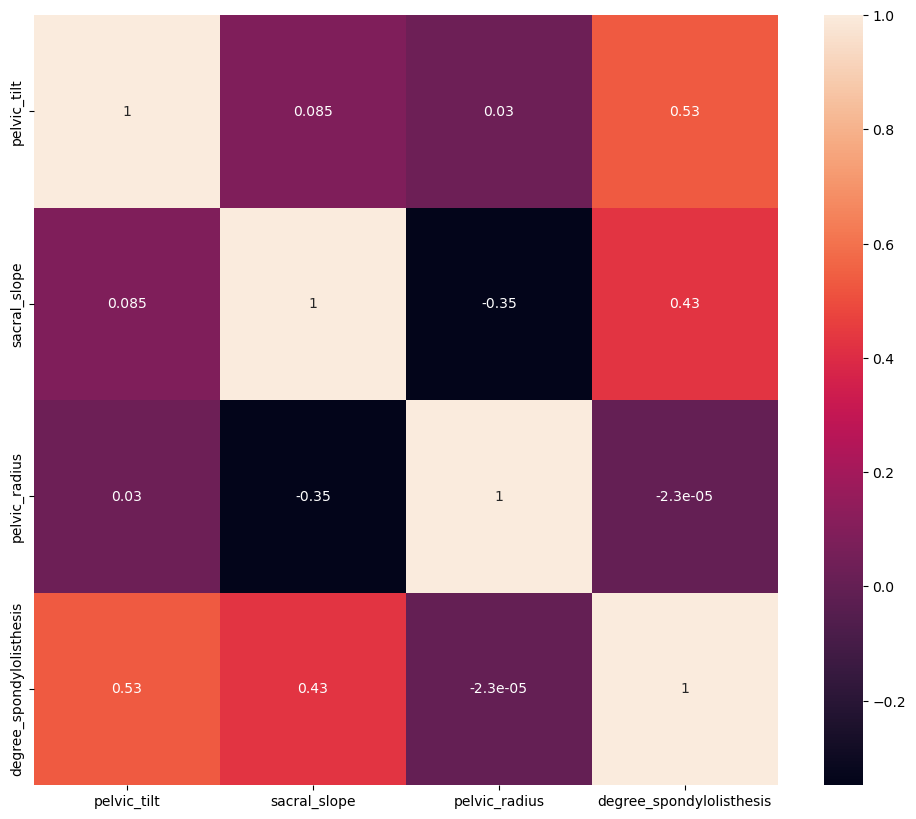

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [20]:
df["Class_att"]=pd.get_dummies(df["Class_att"],drop_first=True)

In [21]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

,const,pelvic_tilt,sacral_slope,pelvic_radius,degree_spondylolisthesis,Class_att
0,1.0,22.552586,40.475232,98.672917,-0.254400,0
1,1.0,10.060991,28.995960,114.405425,4.564259,0
2,1.0,22.218482,46.613539,105.985135,-3.530317,0
3,1.0,24.652878,44.644130,101.868495,11.211523,0
4,1.0,9.652075,40.060784,108.168725,7.918501,0


In [22]:
cols=df_constant.columns[:-1]
model=sm.Logit(df.Class_att,df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Class_att   No. Observations:                  309
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            4
Date:                Mon, 08 May 2023   Pseudo R-squ.:                     inf
Time:                        08:22:26   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -15.4552      3.273     -4.723      0.000     -21.869      -9.041
pelvic_tilt                 -0.0665      0.029     -2.272      0.023      -0.124      -0.009
sacral_slope                 0.1149      0.023      5.072      0.000       0.071       0.159
pelvic_radius                0.1089      0.023      4.780      0.000       0.064       0.154
degree_spondylolisthesis    -0.1654      0.023     -7.227      0.000      -0.210      -0.121
============================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [23]:
def back_feature_elem (data_frame,dep_var,col_list):


    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(df_constant,df.Class_att,cols)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [24]:
result.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Class_att   No. Observations:                  309
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            4
Date:                Mon, 08 May 2023   Pseudo R-squ.:                     inf
Time:                        08:22:42   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -15.4552      3.273     -4.723      0.000     -21.869      -9.041
pelvic_tilt                 -0.0665      0.029     -2.272      0.023      -0.124      -0.009
sacral_slope                 0.1149      0.023      5.072      0.000       0.071       0.159
pelvic_radius                0.1089      0.023      4.780      0.000       0.064       0.154
degree_spondylolisthesis    -0.1654      0.023     -7.227      0.000      -0.210      -0.121
============================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [25]:
import sklearn
new_features=df[['pelvic_tilt','sacral_slope','pelvic_radius','degree_spondylolisthesis',"Class_att"]]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [26]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [27]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8709677419354839

<AxesSubplot:>

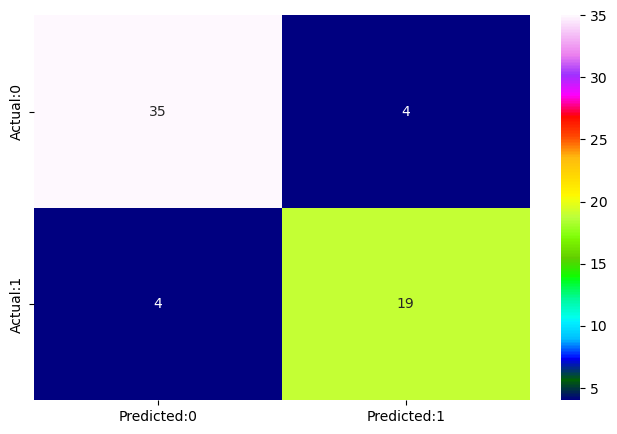

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='gist_ncar')